In [35]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# About Dataset
- This dataset collects data on fatalies terrorists in israel and war palestine peoples.
- Author : Willian Oliveira Gibin and Asaniczka.
- Usability : 10000
- License: CC0: Public Domain

In [36]:
# Read file csv
fatality_df = pd.read_csv('fatalities_isr_pse_conflict_2000_to_2023.csv')
fatality_df.head(20)

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...
5,'Ata Yasser 'Ata Musa,2023-09-19,29.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-20,M,NaN,Jenin,Jenin,gunfire,missile,Israeli security forces,Wounded by shrapnel from a missile fired by Is...
6,Yusef Salem Yusef Radwan,2023-09-19,24.0,Palestinian,Gaza City,Gaza,Gaza Strip,2023-09-19,M,No,Khan Yunis,Khan Yunis,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while participating i...
7,Mahmoud Khaled S'ud 'Ar'arawi,2023-09-19,25.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin R.C.,Jenin,gunfire,missile,Israeli security forces,Wounded by shrapnel from a missile fired by Is...
8,Mahmoud 'Ali Nafe'a a-S'adi,2023-09-19,23.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin R.C.,Jenin,gunfire,missile,Israeli security forces,Wounded by shrapnel from a missile fired by Is...
9,Milad Munzer Wajih a-Ra'i,2023-09-09,15.0,Palestinian,al-'Arrub R.C.,Hebron,West Bank,2023-09-09,M,NaN,al-'Arrub Camp,Hebron,gunfire,live ammunition,Israeli security forces,Fatally shot by a soldier after throwing two M...


In [37]:
# Number of rows and columns
n_rows, n_cols = fatality_df.shape

In [ ]:
# The meaning of each row


In [8]:
# Check duplicated rows
is_duplicated = fatality_df.duplicated().any()
if is_duplicated:
    # Bỏ hàng hay fill giá trị khác vào?


True

In [ ]:
# The meaning of each column?

In [12]:
# The current data type of each column?
fatality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

In [21]:
# Analyzing the distribution 
fatality_df.describe(include="all")

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
count,11124,11124,10995.000000,11124,11124,11124,11124,11124,11104,9694,11056,11056,10833,5871,11124,10844
unique,11083,2405,NaN,4,494,20,3,2593,2,5,580,20,13,21,3,6744
top,Name unknown to B'Tselem,2008-12-27,NaN,Palestinian,Gaza City,Gaza,Gaza Strip,2008-12-27,M,No,Gaza city,Gaza,gunfire,missile,Israeli security forces,"Killed during ""Operation Defensive Shield."""
freq,23,357,NaN,10092,2232,2435,7733,341,9681,4653,2283,2453,9849,2877,10000,113
mean,NaN,NaN,26.745703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,13.780548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Selecting numerical columns,
numerical_columns = fatality_df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the percentage of missing values
missing_percentage_numerical = fatality_df[numerical_columns].isnull().mean() * 100

# Calculate min and max
min_values = fatality_df[numerical_columns].min()
max_values = fatality_df[numerical_columns].max()

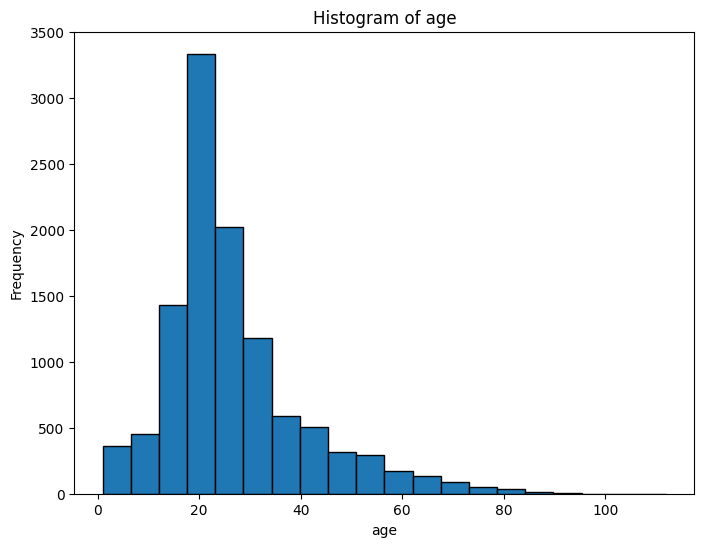

In [26]:
# Histogram for each column of numbericals
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(fatality_df[column].dropna(), bins=20, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.show()

In [ ]:
# Abnormal?

In [34]:
# Selecting categorical columns
categorical_columns = fatality_df.select_dtypes(include=['object']).columns

# Calculate the percentage of missing values
missing_percentage_categorical = fatality_df[categorical_columns].isnull().mean() * 100

# Number of unique values in each categorical column
num_unique_values =  fatality_df[categorical_columns].nunique()

# Show a few unique values for each categorical column
for column in categorical_columns:
    unique_values = fatality_df[column].unique()[:5] 
    print(f"Unique values for {column}: {unique_values}")
    print("\n")

Unique values for name: ["'Abd a-Rahman Suleiman Muhammad Abu Daghash"
 "Usayed Farhan Muhammad 'Ali Abu 'Ali" "'Abdallah 'Imad Sa'ed Abu Hassan"
 'Durgham Muhammad Yihya al-Akhras' "Raafat 'Omar Ahmad Khamaisah"]


Unique values for date_of_event: ['2023-09-24' '2023-09-22' '2023-09-20' '2023-09-19' '2023-09-09']


Unique values for citizenship: ['Palestinian' 'Israeli' 'Jordanian' 'American']


Unique values for event_location: ['Nur Shams R.C.' 'Kfar Dan' "'Aqbat Jaber R.C." 'Jenin R.C.' 'Gaza City']


Unique values for event_location_district: ['Tulkarm' 'Jenin' 'Jericho' 'Gaza' 'Hebron']


Unique values for event_location_region: ['West Bank' 'Gaza Strip' 'Israel']


Unique values for date_of_death: ['2023-09-24' '2023-09-22' '2023-09-20' '2023-09-19' '2023-09-09']


Unique values for gender: ['M' 'F' nan]


Unique values for took_part_in_the_hostilities: [nan 'No' 'Yes' 'Unknown' 'Israelis']


Unique values for place_of_residence: ['Nur Shams R.C.' 'al-Yamun' "'Aqbat Jaber R.C." 

In [ ]:
# Abnormal?